In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [90]:
# Load dataset
df = pd.read_csv("project1.csv")
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [91]:
# Shape and size of raw data
print("Shape of dataset:", df.shape)
print("Size of dataset:", df.size)

Shape of dataset: (386, 10)
Size of dataset: 3860


In [92]:
# Data types check
print("Data Types:")
print(df.dtypes)

# Convert target variable to numerical
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

Data Types:
class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object


In [93]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)


Number of duplicate rows: 11
Duplicates removed. New shape: (375, 10)


In [94]:
# Handle Missing/Invalid Values (replace '?' with NaN)
df.replace('?', np.nan, inplace=True)
print("\nMissing values before treatment:")
print(df.isnull().sum())

# Define categorical and numerical columns
cat_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
num_cols = ['deg-malig']  # Ordinal (1, 2, 3)

# Impute missing values
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

for col in num_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("\nMissing values after treatment:")
print(df.isnull().sum())


Missing values before treatment:
class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      6
deg-malig      0
breast         0
breast-quad    4
irradiat       0
dtype: int64

Missing values after treatment:
class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


/tmp/ipykernel_49/3951878347.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
/tmp/ipykernel_49/3951878347.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

<Figure size 1000x600 with 0 Axes>

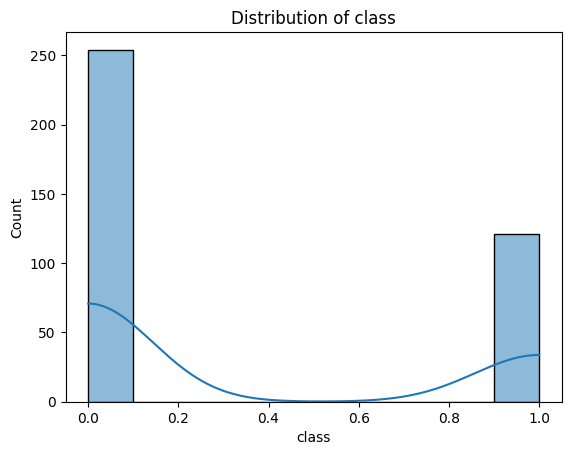

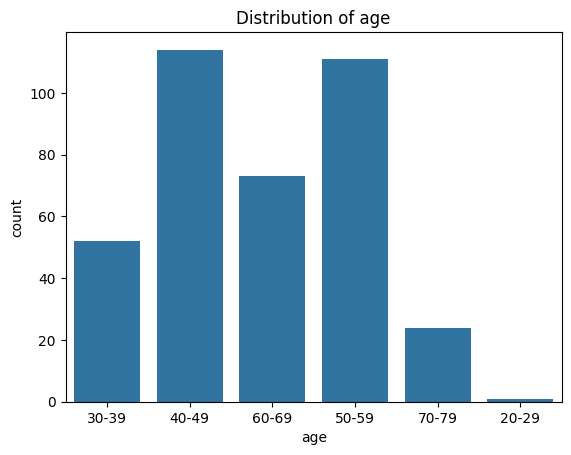

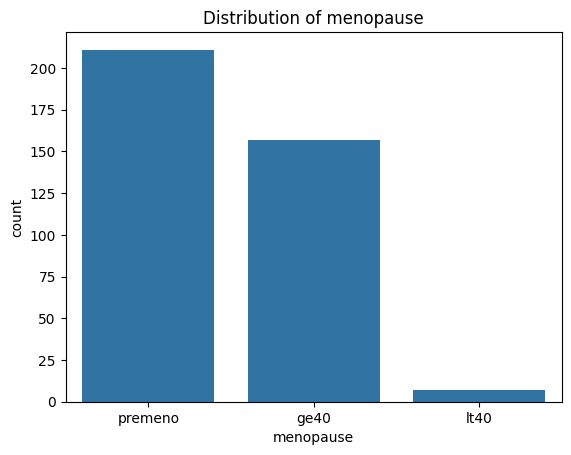

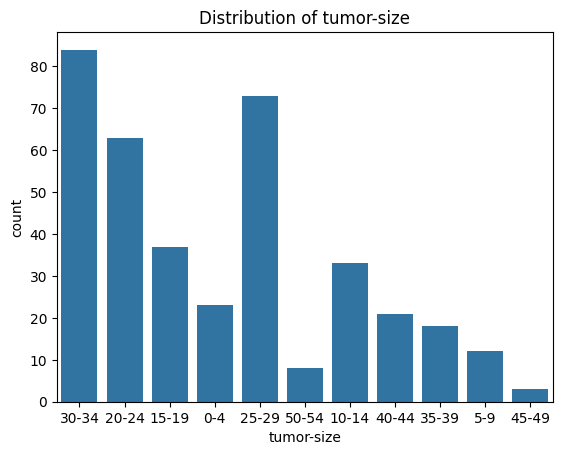

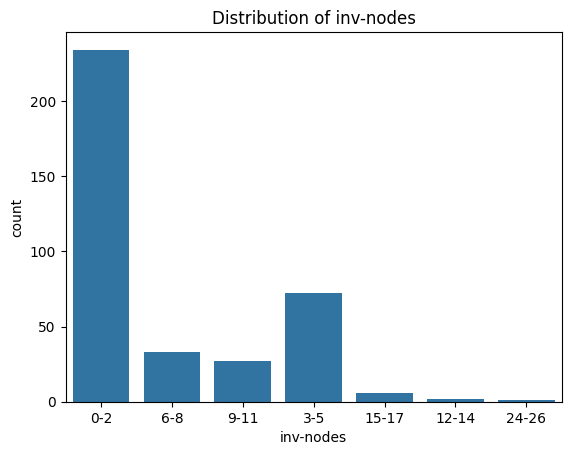

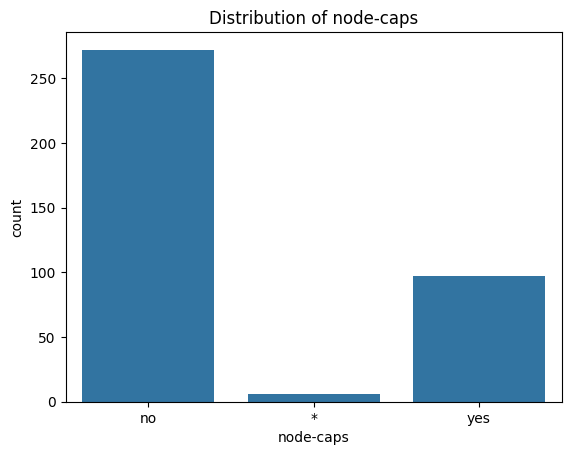

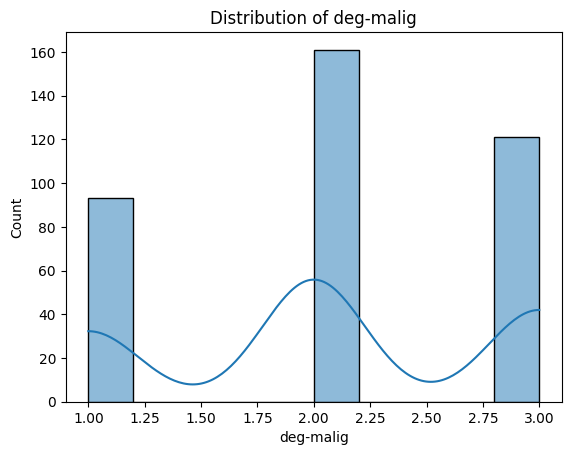

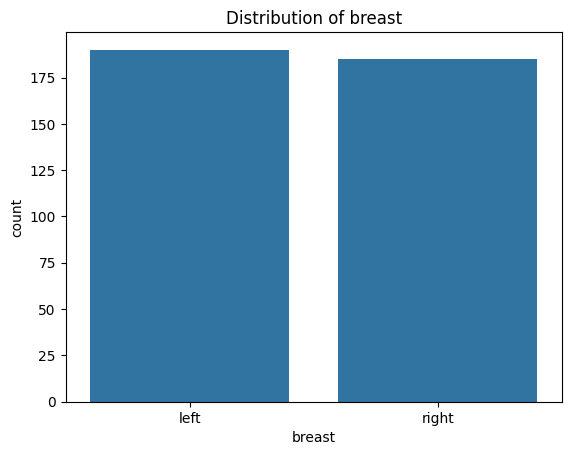

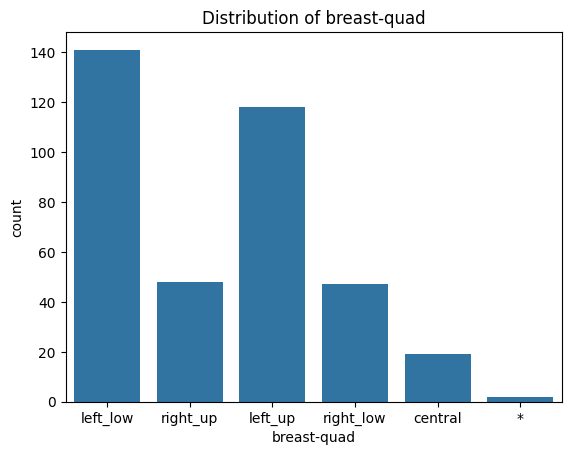

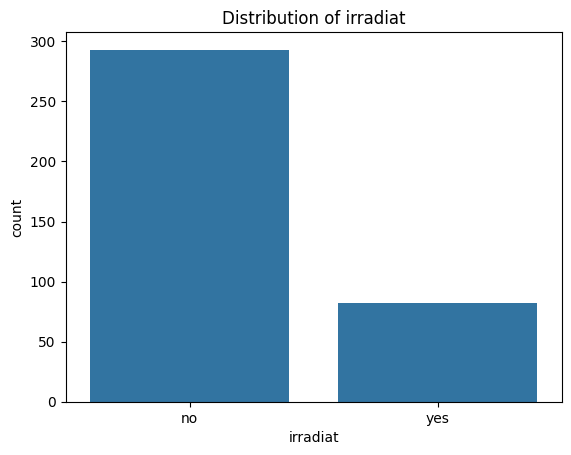

In [95]:
# Univariate analysis
plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.figure()
    if df[col].dtype == 'object':
        sns.countplot(x=df[col])
    else:
        sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [96]:
# Perform one-hot encoding on categorical variables
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nDataset after one-hot encoding:")
print(df_encoded.head())


Dataset after one-hot encoding:
   class  deg-malig  age_30-39  age_40-49  age_50-59  age_60-69  age_70-79  \
0      1          3       True      False      False      False      False   
1      0          2      False       True      False      False      False   
2      1          2      False       True      False      False      False   
3      0          2      False      False      False       True      False   
4      0          2      False       True      False      False      False   

   menopause_lt40  menopause_premeno  tumor-size_10-14  ...  inv-nodes_9-11  \
0           False               True             False  ...           False   
1           False               True             False  ...           False   
2           False               True             False  ...           False   
3           False              False             False  ...           False   
4           False               True             False  ...           False   

   node-caps_no  node-c

In [97]:
X = df_encoded.drop('class', axis=1)  
y = df_encoded['class'] 
print(y)

0      1
1      0
2      1
3      0
4      0
      ..
381    0
382    0
383    0
384    0
385    0
Name: class, Length: 375, dtype: int64


In [98]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [105]:
# K-Nearest Neighbor Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Classifier (k=5):")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier (k=5):
              precision    recall  f1-score   support

           0       0.66      0.76      0.71        51
           1       0.25      0.17      0.20        24

    accuracy                           0.57        75
   macro avg       0.46      0.47      0.45        75
weighted avg       0.53      0.57      0.55        75



In [106]:
# K-Nearest Neighbor Classifier using Grid search CV
param_grid = {'n_neighbors': range(1, 21)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Best KNN parameters: {grid_search.best_params_}")

y_pred_best_knn = best_knn.predict(X_test)

print("K-Nearest Neighbors Classifier with Grid Search CV:")
print(classification_report(y_test, y_pred_best_knn))

Best KNN parameters: {'n_neighbors': 18}
K-Nearest Neighbors Classifier with Grid Search CV:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        51
           1       0.33      0.04      0.07        24

    accuracy                           0.67        75
   macro avg       0.51      0.50      0.44        75
weighted avg       0.57      0.67      0.57        75



In [107]:
# Linear classification
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        51
           1       0.45      0.21      0.29        24

    accuracy                           0.67        75
   macro avg       0.58      0.55      0.53        75
weighted avg       0.62      0.67      0.62        75

